# Capstone 2 Pre-processing and Training Data Development

In [2]:
#load python packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
# Load the data. 
df = pd.read_csv('Alternative_Schools.csv')

In [4]:
df.head()

,LEAID,NAME,CITY,STATE,MEMBER_alt,revised,hasReassignedSchools,altRatio_99,altRatio,altRatio_growth,...,pdiff_puptch,TEACH_FYSY_RATIO_reg,TEACH_FYSY_RATIO_alt,pdiff_TEACH_FYSY_RATIO,TEACH_ABSENT_RATIO_reg,TEACH_ABSENT_RATIO_alt,pdiff_TEACH_ABSENT_RATIO,gradRate_reg,gradRate_alt,ppdiff_gradRate
0,100390,BIRMINGHAM CITY,BIRMINGHAM,AL,20,False,False,0.005357,0.002079,-0.003279,...,NaN,0.103709,0.000000,-1.000000,0.068522,0.400000,4.837514,79.659940,NaN,NaN
1,101380,ETOWAH COUNTY,GADSDEN,AL,173,False,False,0.000000,0.036034,0.036034,...,2.501920,0.058720,0.000000,-1.000000,0.407369,0.000000,-1.000000,87.882852,17.0,-70.882852
2,101620,GADSDEN CITY,GADSDEN,AL,9,False,False,0.010977,0.003270,-0.007706,...,NaN,0.159057,NaN,NaN,0.511340,NaN,NaN,73.000000,NaN,NaN
3,102310,MARION COUNTY,HAMILTON,AL,4,False,False,0.002670,0.002119,-0.000551,...,-0.878292,0.040213,0.000000,-1.000000,0.150799,0.000000,-1.000000,77.000000,NaN,NaN
4,102370,MOBILE COUNTY,MOBILE,AL,205,False,False,0.005539,0.006816,0.001278,...,-0.883871,0.125812,0.117647,-0.064899,0.180154,0.235294,0.306075,83.275161,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1923 entries, 0 to 1922
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   LEAID                     1923 non-null   int64  
 1   NAME                      1923 non-null   object 
 2   CITY                      1923 non-null   object 
 3   STATE                     1923 non-null   object 
 4   MEMBER_alt                1923 non-null   int64  
 5   revised                   1923 non-null   bool   
 6   hasReassignedSchools      1923 non-null   bool   
 7   altRatio_99               1890 non-null   float64
 8   altRatio                  1913 non-null   float64
 9   altRatio_growth           1890 non-null   float64
 10  pupMONEY_reg              1766 non-null   float64
 11  pupMONEY_alt              1807 non-null   float64
 12  pdiff_pupMONEY            1683 non-null   float64
 13  hasCounc_reg              1767 non-null   float64
 14  hasCounc

## Create dummy or indicator features for categorical variables

In [6]:
dummy = pd.get_dummies(df['STATE'])
dummy.head()

,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,RI,SD,TN,TX,UT,VA,WA,WI,WV,WY
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Standardize the magnitude of numeric features using a scaler

In [7]:
from sklearn.preprocessing import StandardScaler
drop_df = df.drop(['LEAID', 'NAME', 'CITY', 'STATE'], axis=1)
names = drop_df.columns
scaler = StandardScaler()
scaled_df = scaler.fit_transform(drop_df)
scaled_df = pd.DataFrame(scaled_df, columns=names)
scaled_df.head()

,MEMBER_alt,revised,hasReassignedSchools,altRatio_99,altRatio,altRatio_growth,pupMONEY_reg,pupMONEY_alt,pdiff_pupMONEY,hasCounc_reg,...,pdiff_puptch,TEACH_FYSY_RATIO_reg,TEACH_FYSY_RATIO_alt,pdiff_TEACH_FYSY_RATIO,TEACH_ABSENT_RATIO_reg,TEACH_ABSENT_RATIO_alt,pdiff_TEACH_ABSENT_RATIO,gradRate_reg,gradRate_alt,ppdiff_gradRate
0,-0.367913,-0.072301,-0.539077,-0.348477,-0.472219,-0.240827,0.122770,0.134332,-0.033294,0.209433,...,NaN,-0.121185,-0.607502,-0.344325,-1.043235,0.700338,1.728497,-1.148793,NaN,NaN
1,-0.097866,-0.072301,-0.539077,-0.374959,-0.318339,0.098151,-0.148202,3.072690,3.189225,0.502815,...,0.392888,-0.651642,-0.607502,-0.344325,0.832713,-0.874826,-0.362981,-0.161581,-1.063622,-1.192219
2,-0.387328,-0.072301,-0.539077,-0.320700,-0.466819,-0.279002,0.026539,NaN,NaN,0.502815,...,NaN,0.531396,NaN,NaN,1.408321,NaN,NaN,-1.948361,NaN,NaN
3,-0.396153,-0.072301,-0.539077,-0.361762,-0.472038,-0.217307,0.635359,0.876279,0.123755,0.502815,...,-0.173747,-0.869849,-0.607502,-0.344325,-0.587728,-0.874826,-0.362981,-1.468136,NaN,NaN
4,-0.041386,-0.072301,-0.539077,-0.347581,-0.450750,-0.201540,-0.198447,0.778554,0.958178,0.502815,...,-0.174682,0.139420,0.068905,-0.066656,-0.425215,0.051741,0.104963,-0.714763,NaN,NaN


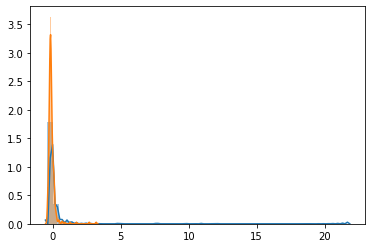

In [34]:
# Add indicator column for difference in graduation rate 
scaled_df['ppdiff_gradRate_ind'] = np.where(scaled_df.ppdiff_gradRate.isnull(), 0, 1)

# histograms to compare distributions based on whether difference in graduation rates is reported 
#scaled_df.hist([scaled_df.loc[]])
#plt.show()

target_0 = scaled_df.loc[scaled_df['ppdiff_gradRate_ind'] == 0]
target_1 = scaled_df.loc[scaled_df['ppdiff_gradRate_ind'] == 1]

sns.distplot(target_0[['pdiff_pupMONEY']])
sns.distplot(target_1[['pdiff_pupMONEY']])

plt.show()

In [35]:
# Merge dummy and scaled variables 
df_concat = pd.concat([scaled_df, dummy], axis=1)

In [38]:
# Drop rows that do not have difference in graduation rate
df_graddiff = df_concat[df_concat['ppdiff_gradRate'].notna()]

## Split into testing and training datasets

In [39]:
from sklearn.model_selection import train_test_split
X = df_graddiff.drop(['ppdiff_gradRate', 'ppdiff_gradRate_ind'], axis=1)
y = df_graddiff['ppdiff_gradRate']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=629)